# Clustering and PCA

In this assignment, you will be exploring difference between clique and kmeans algorithms for clustering and will get better understanding of PCA & Kmeans algorithms by manually implementing both of them.

--------------------

In [644]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from pyclustering.cluster.clique import clique, clique_visualizer
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES


In [645]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)
# X = pd.DataFrame(X)
# y = pd.DataFrame(y)

# Questoin 1
Scatter plot the dataset

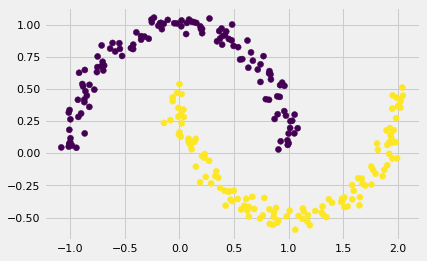

In [646]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

it will fail because it's complex geometric shape (not a spherical)

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train KMeans model using "k = 2".
4. Comment on the results.

In [647]:
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [648]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 251.4658762402366
2 : 99.48652012837258
3 : 68.09834880889488
4 : 43.71258429114967
5 : 32.6779240260468
6 : 22.71525707929522
7 : 17.632039232362946
8 : 13.043256304011406
9 : 10.87294350797171


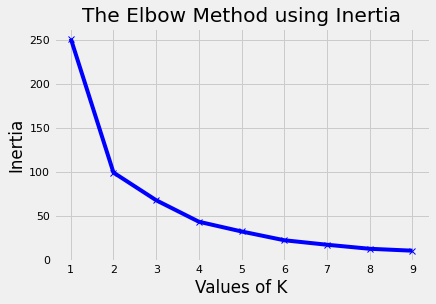

In [649]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

from the graph the best k is 2

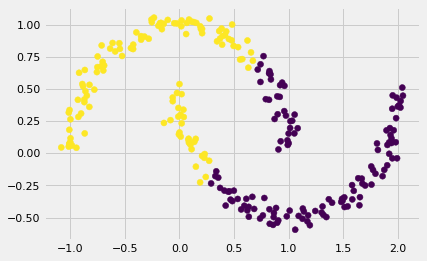

In [650]:
K_Means = KMeans(n_clusters=2).fit(X)
predict = K_Means.predict(X)

plt.scatter(X[:, 0], X[:, 1],c = predict,cmap = 'viridis')

k-means clustering fails to detect the right 2 clusters of the moons' data.

# Question 4
1. If you are going to use clique, what is a proper threshold value for the above dataset.
2. Find the best interval value that cluster the data into two clusters, plot the results.
3. Why do you think clique performed better on this dataset in comparison with KMeans?

In [651]:
def Clique(intervals, threshold, data) :
  clique_instance = clique(data, intervals, threshold)
  # start clustering process and obtain results
  clique_instance.process()
  clusters = clique_instance.get_clusters()  # allocated clusters
  noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
  cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
  print("Amount of clusters:", len(clusters))
  # visualize clustering results
  clique_visualizer.show_grid(cells, data)    # show grid that has been formed by the algorithm
  clique_visualizer.show_clusters(data, clusters, noise)  # show clustering results

Amount of clusters: 2


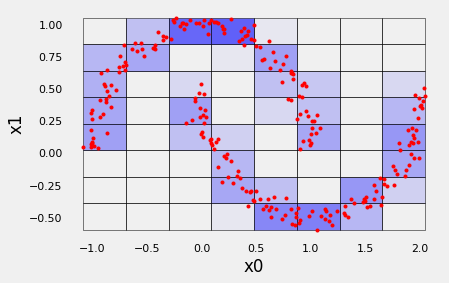

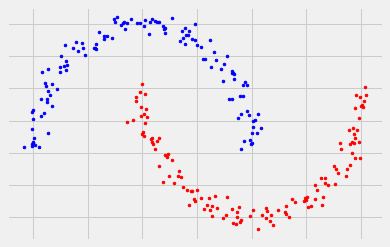

In [652]:
Clique(8,0,X) #threshold = 8 (no outliers)

because it's complex geometric shape (not a spherical) so K-means fails.

# Question 5
For the following dataset
1. Run kmeans algorithm clustering using k=2.
2. Run clique algorithm using interval = 15 and threshold = 6.
3. Plot results of both algorithms.
4. Comment on the following
    * What is the number of clusters in case of clique? and why?
    * Why do kmeans fail to cluster such data?

In [653]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)


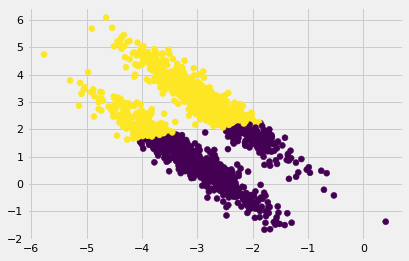

In [654]:
K_Means = KMeans(n_clusters=2).fit(X_aniso)
predict = K_Means.predict(X_aniso)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1],c = predict,cmap = 'viridis')

Amount of clusters: 4


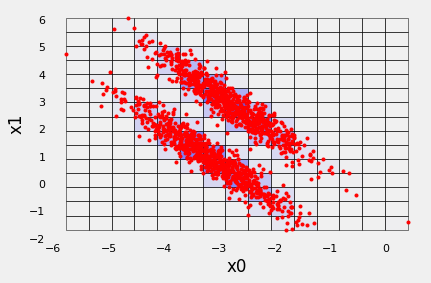

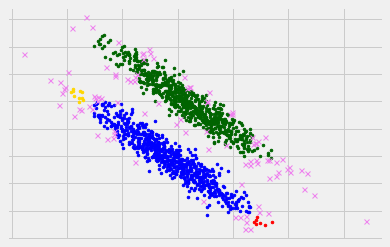

In [655]:
Clique(15, 6, X_aniso)

**comments**

What is the number of clusters in case of clique? and why? 
- 4 because there are several data points that are considered outliers so that seperates data from each other.

Why do kmeans fail to cluster such data?
- because data doesn't have a spherical shape (different variances).

# Question 6

Write your own PCA function that will return:
* The sorted eigenvectors of principal components
* The corresponding eigenvalues
* The transformed data

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [656]:
def PCA(org_data):
  # Subtract mean from data
  mean = np.mean(org_data, axis= 0)
  mean_data = org_data - mean
  # Compute covariance matrix
  cov = np.cov(mean_data.T)
  cov = np.round(cov, 2)
  eig_val, eig_vec = np.linalg.eig(cov)
  # Sort eigen values and corresponding eigen vectors in descending order
  indices = np.arange(0,len(eig_val), 1)
  indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
  eig_val = eig_val[indices]
  eig_vec = eig_vec[:,indices]
  # Get explained variance
  sum_eig_val = np.sum(eig_val)
  explained_variance = eig_val/ sum_eig_val
  cumulative_variance = np.cumsum(explained_variance)
  pca_data = np.dot(mean_data, eig_vec)
  return eig_val, eig_vec, pca_data

eig_value, eig_vector, pca_data = PCA(X)

# Question 7
Write your own K-means clustering, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [657]:
from numpy.linalg import norm


class myKmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

In [658]:
km = myKmeans(n_clusters=2)
km.fit(X)
centroids = km.centroids
print(centroids)

[[-4.58881345  0.02187336]
 [-8.93950323 -5.51160524]]
